# KNN

In [8]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

## 데이터 불러오기

In [9]:
data = []
with open('iris.data', 'r') as f:
    for line in f:
        if line.strip():
            item = line.strip().split(",")
            data.append(([float(val) for val in item[:-1]], item[-1]))

data

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.0, 1.4, 0.2], 'Iris-setosa'),
 ([4.7, 3.2, 1.3, 0.2], 'Iris-setosa'),
 ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'),
 ([5.0, 3.6, 1.4, 0.2], 'Iris-setosa'),
 ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'),
 ([4.6, 3.4, 1.4, 0.3], 'Iris-setosa'),
 ([5.0, 3.4, 1.5, 0.2], 'Iris-setosa'),
 ([4.4, 2.9, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'),
 ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'),
 ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'),
 ([4.8, 3.0, 1.4, 0.1], 'Iris-setosa'),
 ([4.3, 3.0, 1.1, 0.1], 'Iris-setosa'),
 ([5.8, 4.0, 1.2, 0.2], 'Iris-setosa'),
 ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'),
 ([5.4, 3.9, 1.3, 0.4], 'Iris-setosa'),
 ([5.1, 3.5, 1.4, 0.3], 'Iris-setosa'),
 ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'),
 ([5.1, 3.8, 1.5, 0.3], 'Iris-setosa'),
 ([5.4, 3.4, 1.7, 0.2], 'Iris-setosa'),
 ([5.1, 3.7, 1.5, 0.4], 'Iris-setosa'),
 ([4.6, 3.6, 1.0, 0.2], 'Iris-setosa'),
 ([5.1, 3.3, 1.7, 0.5], 'Iris-setosa'),
 ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'),


In [10]:
species = {s: i for i, s in enumerate(set(d[1] for d in data))}
data = [(d[0], species[d[1]]) for d in data]
data

[([5.1, 3.5, 1.4, 0.2], 0),
 ([4.9, 3.0, 1.4, 0.2], 0),
 ([4.7, 3.2, 1.3, 0.2], 0),
 ([4.6, 3.1, 1.5, 0.2], 0),
 ([5.0, 3.6, 1.4, 0.2], 0),
 ([5.4, 3.9, 1.7, 0.4], 0),
 ([4.6, 3.4, 1.4, 0.3], 0),
 ([5.0, 3.4, 1.5, 0.2], 0),
 ([4.4, 2.9, 1.4, 0.2], 0),
 ([4.9, 3.1, 1.5, 0.1], 0),
 ([5.4, 3.7, 1.5, 0.2], 0),
 ([4.8, 3.4, 1.6, 0.2], 0),
 ([4.8, 3.0, 1.4, 0.1], 0),
 ([4.3, 3.0, 1.1, 0.1], 0),
 ([5.8, 4.0, 1.2, 0.2], 0),
 ([5.7, 4.4, 1.5, 0.4], 0),
 ([5.4, 3.9, 1.3, 0.4], 0),
 ([5.1, 3.5, 1.4, 0.3], 0),
 ([5.7, 3.8, 1.7, 0.3], 0),
 ([5.1, 3.8, 1.5, 0.3], 0),
 ([5.4, 3.4, 1.7, 0.2], 0),
 ([5.1, 3.7, 1.5, 0.4], 0),
 ([4.6, 3.6, 1.0, 0.2], 0),
 ([5.1, 3.3, 1.7, 0.5], 0),
 ([4.8, 3.4, 1.9, 0.2], 0),
 ([5.0, 3.0, 1.6, 0.2], 0),
 ([5.0, 3.4, 1.6, 0.4], 0),
 ([5.2, 3.5, 1.5, 0.2], 0),
 ([5.2, 3.4, 1.4, 0.2], 0),
 ([4.7, 3.2, 1.6, 0.2], 0),
 ([4.8, 3.1, 1.6, 0.2], 0),
 ([5.4, 3.4, 1.5, 0.4], 0),
 ([5.2, 4.1, 1.5, 0.1], 0),
 ([5.5, 4.2, 1.4, 0.2], 0),
 ([4.9, 3.1, 1.5, 0.1], 0),
 ([5.0, 3.2, 1.2, 0.

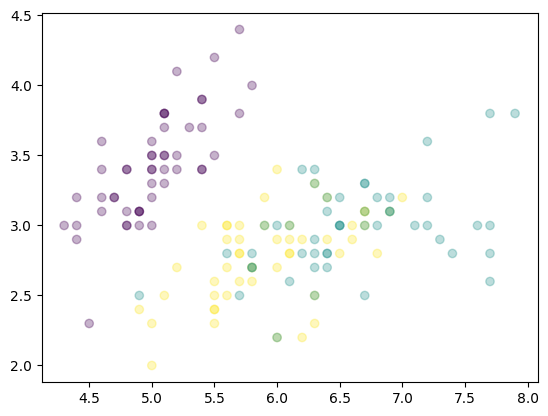

In [11]:
plt.scatter([d[0][0] for d in data], [d[0][1] for d in data], c=[d[1] for d in data], alpha=0.3)
plt.show()

## 데이터 분리하기
train data, test data로 분리하기

In [12]:
random.shuffle(data)
train = data[:-30]
test = data[-30:]
data

[([5.0, 3.4, 1.5, 0.2], 0),
 ([4.9, 3.1, 1.5, 0.1], 0),
 ([6.6, 3.0, 4.4, 1.4], 2),
 ([5.7, 2.8, 4.1, 1.3], 2),
 ([5.9, 3.0, 5.1, 1.8], 1),
 ([5.2, 2.7, 3.9, 1.4], 2),
 ([5.6, 2.9, 3.6, 1.3], 2),
 ([6.3, 2.3, 4.4, 1.3], 2),
 ([5.6, 2.7, 4.2, 1.3], 2),
 ([6.3, 2.7, 4.9, 1.8], 1),
 ([4.8, 3.1, 1.6, 0.2], 0),
 ([6.7, 3.3, 5.7, 2.1], 1),
 ([5.6, 2.5, 3.9, 1.1], 2),
 ([4.4, 3.2, 1.3, 0.2], 0),
 ([6.4, 2.8, 5.6, 2.1], 1),
 ([5.1, 3.5, 1.4, 0.2], 0),
 ([6.3, 2.5, 5.0, 1.9], 1),
 ([5.5, 2.3, 4.0, 1.3], 2),
 ([5.5, 2.4, 3.7, 1.0], 2),
 ([5.0, 3.5, 1.3, 0.3], 0),
 ([5.7, 4.4, 1.5, 0.4], 0),
 ([7.6, 3.0, 6.6, 2.1], 1),
 ([4.5, 2.3, 1.3, 0.3], 0),
 ([5.4, 3.7, 1.5, 0.2], 0),
 ([6.7, 3.1, 4.4, 1.4], 2),
 ([6.3, 3.4, 5.6, 2.4], 1),
 ([4.9, 2.5, 4.5, 1.7], 1),
 ([4.9, 2.4, 3.3, 1.0], 2),
 ([4.3, 3.0, 1.1, 0.1], 0),
 ([7.1, 3.0, 5.9, 2.1], 1),
 ([7.7, 2.6, 6.9, 2.3], 1),
 ([5.8, 4.0, 1.2, 0.2], 0),
 ([5.1, 3.5, 1.4, 0.3], 0),
 ([6.0, 3.0, 4.8, 1.8], 1),
 ([6.7, 3.0, 5.0, 1.7], 2),
 ([6.2, 2.2, 4.5, 1.

## 거리 계산하기

In [13]:
def distance(a, b):
    s = 0
    for i in range(len(a[0])):
        s += (a[0][i] - b[0][i]) ** 2
    return s ** 0.5

## KNN 분류하기

In [14]:
def knn_classify(k, query, train):
    knns = sorted((distance(point, query), point) for point in train)[:k]

    scores = {}
    for dist, point in knns:
        scores[point[1]] = scores.get(point[1], 0) + 1/(1+dist)

    resp, score = max(scores.items(), key=lambda x: x[1])

    return resp

## Test

In [15]:
k = 3
correct = sum(1 for t in test if knn_classify(k, t, train) == t[1])
accuracy = correct/len(test)
print("accuracy:", accuracy)

accuracy: 0.9666666666666667


## 최적의 K 찾기

100%|██████████| 100/100 [00:10<00:00,  9.67it/s]


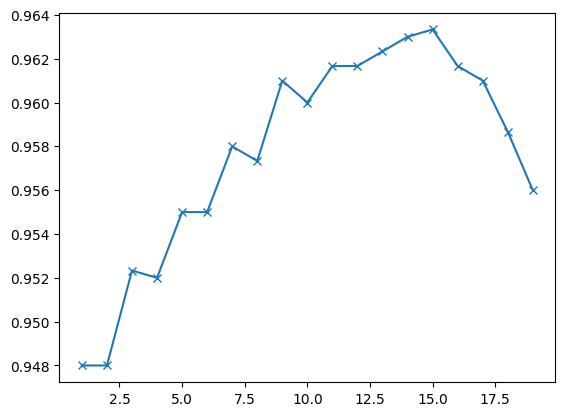

In [16]:
num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

corrects = [0] * 20

for i in tqdm(range(num_trials)):
    random.shuffle(data)
    train = data[:train_size]
    test = data[train_size:]

    for k in range(1, 20):
        corrects[k] += sum(1 for t in test if knn_classify(k, t, train) == t[1])

for k in range(1, 20):
    corrects[k] /= num_trials * test_size

plt.plot(range(1, 20), corrects[1:], '-x')
plt.show()
